# Analyzing Segmentador data
Gabriel Emilio Herrera Oropeza <br>
13/06/2022

## *INSTRUCTIONS TO DEVELOPERS*

**Make sure to fetch and pull the most updated code and run `pip install .` before using the jupyter notebooks. Codes are constantly being improved and the workflow below work best with the newest version.**

This document describes the workflow to analyze data from segmented images that were previously processed by `insert tool name`. We will show how to import, visualise, filter and cluster the data using robust, simple-to-use functions. Many of these functions take up positional arguments that can be modified. To display the usage of these functions, run `help(name_of_function)`.

We begin by importing the `tool name` module.

In [12]:
from ngtools.analyzer import Analyzor,embeddingPlotter

## Create Analyzor object class

We provide an Analyzor object class that facilitates storage of nuclei segmented data and its downstream processing. To construct this object, we can easily pass the path to Segmentador output directory to `Analyzor` class function:

In [2]:
path_to_experiments = "../data/sample_output"
obj = Analyzor(path_to_experiments)

### Preview data

You may extract information from the Analyzor object in many ways. Below are some useful functions:

In [ ]:
# print out number of cells
obj.ncells()

# print out features from Segmentador
obj.features()

# preview data
obj.showData()
obj.showData(["cellID", "avg_intensity_dapi"])

### Plot data

Data from Analyzor object can be visualised using scatterplot, violinplot or lineplot. For example, to plot a scatterplot of `nuclear_area` against `avg_intensity_dapi`, you can run:

In [ ]:
obj.plotData(x = "nuclear_area", y = "avg_intensity_dapi",
            plot_type = "scatter", hue = None)

You may color cells by any categorical variable in your data by providing a feature name to the `hue` parameter. The x- and y-axis can be transformed and the order of the cells can be shuffled. Run `help(obj.plotData)` for a guide.

### Show cell images

The Analyzor object holds the path to the image of each cells and has the ability to display this image.
Simply run the `showCell` function:

In [ ]:
obj.showCell()

Running the above function without any input parameters will invoke an interactive prompt. Alternatiely, you may provide the number of cells and channels to display as such:

In [ ]:
obj.showCell(n=5, ch2show = {'red': "RFP", 'green': "Beta3"})

To maximise the use of RGB channels, `showCell` will show the DAPI/nucleus as a separate layer by default. This can be switched off using the `show_nucleus` flag:

In [ ]:
obj.showCell(n=5, ch2show = {'red': "RFP", 'green': "Beta3"}, show_nucleus = False)

## Data preprocessing

### Center DAPI intensity

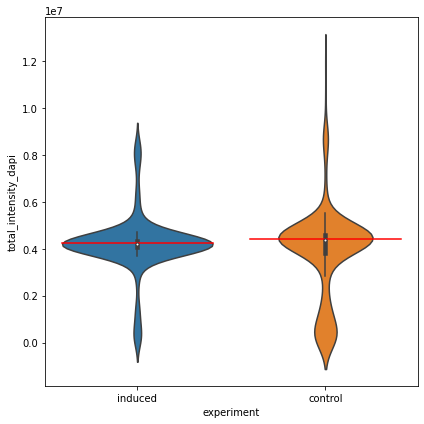

In [3]:
obj.ctrDAPI()

### Identify Single Cells
Identify single cells based on DNA marker content.

In [4]:
obj.findSingleCells()

100%|███████████████████████████████████████| 2/2 [00:00<00:00, 29.23it/s]


### Normalize channel intensities

In [5]:
obj.normIntensity(method = "mode", nbins = 100)

100%|███████████████████████████████████████| 2/2 [00:00<00:00,  8.36it/s]


**TO DO**: Order_by feature

### Filter cells

In [6]:
# Keep only single cells
obj.filterCells(expr = "isSingleCell == True")

### Intensity Normalisation
Statistic-based normalisation of intensity data. **Options are: mode, mean, and median.** *nbins* is used only when method is *mode*. DAPI channel is not normalised.

In [8]:
obj.normIntensity(method = "mode", nbins = 100)

100%|███████████████████████████████████████| 2/2 [00:00<00:00, 20.48it/s]


Observe data before normalisation for a channel. The red line represents the statistical method value used for normalisation.

In [ ]:
obj.plotData("experiment", "avg_intensity_rfp", plot_type = "violin", data_type="norm", hue="iNs")

## Dimensional reduction and clustering

In [9]:
obj.buildAData()
obj.normAData()

In [ ]:
obj.showADataVars()
obj.showADataObs()

In [10]:
obj.findNeighbours(method = "umap")
obj.findClusters(method = "leiden", res=0.6)
obj.runDimReduc(method = "umap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


In [14]:
f,t = embeddingPlotter(obj.adata)
f

FigureWidget({
    'data': [{'marker': {'size': 20},
              'mode': 'markers',
              'type': 's…

In [16]:
t

FigureWidget({
    'data': [{'cells': {'align': [left, left, left, left, left],
                        'fill'…

In [ ]:
# Plot UMAP showing features
nga.plotDim(hue = "iNs", method="umap")
nga.plotDim(hue = "leiden", method="umap")

#### DIFFMAP

In [ ]:
nga.findNeighbours(method = "gauss")
nga.findClusters(method = "leiden")
nga.runDimReduc(method = "diffmap")

In [ ]:
nga.plotDim(hue = "leiden", method="diffmap")
nga.plotDim(hue = "iNs", method="diffmap")

#### Pseudotime
Choose a root cell for diffusion pseudotime:

In [ ]:
nga.runPT(root = 3)

In [ ]:
nga.plotDim(hue = "dpt_pseudotime", method="diffmap")

#### Stacked violin plot

In [ ]:
fig, ax = plt.subplots(figsize = (5, 7))
sc.pl.stacked_violin(adata, data_cols, groupby = 'experiment', swap_axes = True, ax = ax, dendrogram = True)
fig.tight_layout()
plt.show()

#### Pseudotime - heatmap

In [ ]:
# Enter order of clusters in pseudotime
pseudotime_path = [3,4,7]

In [ ]:
# Heatmap - pseudotime
sc.pl.paga_path(
    adata, 
    pseudotime_path, 
    data_cols,
    show_node_names = True,
    n_avg = 50,
    annotations = ['dpt_pseudotime'],
    show_colorbar = True,
    color_map = 'coolwarm',
    groups_key = 'leiden',
    color_maps_annotations = {'dpt_pseudotime': 'viridis'},
    title = 'Path',
    return_data = False,
    normalize_to_zero_one = True,
    show = True
)

### Save Object

In [ ]:
adata.write("/save/path/filename.hdf5")